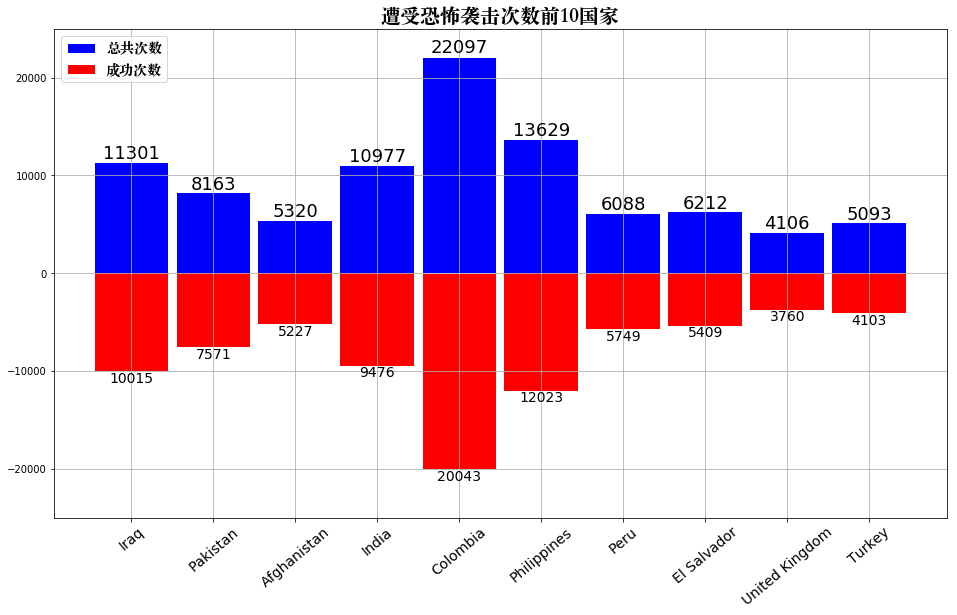

In [16]:
from pandas import DataFrame, Series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 地区恐怖袭击数据
chunker = pd.read_csv('1970-2016世界恐怖袭击数据.csv', dtype=np.str, chunksize=10000)
# 保存数据块
chunk_list = []

for chunck in chunker:
    chunk_list.append(chunck)
    
terrorism_data = pd.concat(chunk_list)
# 将全部为NaN的列剔除
terrorism_data.dropna(how='all', axis=1, inplace=True)
# 将所有NaN的字段设置为字符0
terrorism_data.fillna('0', inplace=True)


# 1. 统计从1970年-2016年恐怖袭击数量
from matplotlib.font_manager import FontProperties
# 加载字体
font = FontProperties(fname='/Library/Fonts/Songti.ttc', size=14)

def my_caculate(data_frame):
    
    # 替换数据中非0 1值
    data_frame = np.where(data_frame == '0', data_frame, np.where(data_frame == '1', data_frame, '0'))
    # print(data_frame[(data_frame != '0') & (data_frame != '1')])
    return data_frame.astype(np.int32).sum()

# 对数据进行分组
terrorism_by_country = terrorism_data['success'].groupby(terrorism_data['country'])

# 总共发动袭击次数
terrorism_count_all = terrorism_by_country.count()
# 成功发动袭击次数
terrorism_count_suc = terrorism_by_country.apply(my_caculate)
# 结果拼接
require_data = pd.concat([terrorism_count_all, terrorism_count_suc], axis=1)
require_data.columns = ['all', 'suc']
# 找出发生恐怖袭击最多的10个国家
require_data = require_data.sort_values(by='all')[-10:][::-1]

require_data['all']
# 绘图

# 设置图片大小
plt.figure(figsize=(16, 9))

plt.bar(require_data['all'].index, 
        require_data['all'].values, 
        color='b', label='总共次数', 
        edgecolor='w', 
        width=0.9
       )
plt.bar(require_data['suc'].index, 
        -require_data['suc'].values, 
        color='r', 
        label='成功次数', 
        edgecolor='w', 
        width=0.9
)
# 显示图例
plt.legend(loc=2, prop=font)
# 设置x轴刻度
plt.xticks([x for x in range(10)], require_data['all'].index, rotation=40, fontsize=14)
# 设置Y取值范围
plt.ylim(-25000, 25000)
# 显示网格
plt.grid()
# 显示bar数值
for a, b in zip(require_data['all'].index, require_data['all'].values):
    plt.text(a, b, str(b), ha='center', va='bottom', fontsize=18)
    
for a, b in zip(require_data['suc'].index, require_data['suc'].values):
    plt.text(a, -b, str(b), ha='center', va='top', fontsize=14)
    
# 显示标题
plt.title('遭受恐怖袭击次数前10国家', fontproperties=font, fontsize=20)

plt.show()